In [20]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

schools = pd.read_csv("school-enrollment.csv")
schools.head(10)
#imports the data set of the different schools around pittsburgh and those enrolled and not enrolled 
#split into specfic columns based upon level of school, margin of error, and not enrolled

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Enrolled in school:,Margin of Error; Enrolled in school:,"Estimate; Enrolled in school: - Enrolled in nursery school, preschool","Margin of Error; Enrolled in school: - Enrolled in nursery school, preschool",Estimate; Enrolled in school: - Enrolled in kindergarten,Margin of Error; Enrolled in school: - Enrolled in kindergarten,...,Estimate; Enrolled in school: - Enrolled in grade 11,Margin of Error; Enrolled in school: - Enrolled in grade 11,Estimate; Enrolled in school: - Enrolled in grade 12,Margin of Error; Enrolled in school: - Enrolled in grade 12,"Estimate; Enrolled in school: - Enrolled in college, undergraduate years","Margin of Error; Enrolled in school: - Enrolled in college, undergraduate years",Estimate; Enrolled in school: - Graduate or professional school,Margin of Error; Enrolled in school: - Graduate or professional school,Estimate; Not enrolled in school,Margin of Error; Not enrolled in school
0,Allegheny Center,1,1389.0,193.000000,394.0,120.000000,48.0,29.000000,0.0,10.000000,...,0.0,10.000000,21.0,32.000000,150.0,60.000000,51.0,35.000000,995.0,135.000000
1,Allegheny West,2,343.0,96.000000,61.0,44.000000,0.0,10.000000,0.0,10.000000,...,9.0,12.000000,0.0,10.000000,2.0,4.000000,25.0,22.000000,282.0,74.000000
2,Allentown,3,2520.0,449.503059,965.0,312.800256,19.0,22.825424,23.0,28.722813,...,41.0,53.823787,81.0,72.718636,125.0,87.120606,74.0,101.469207,1555.0,267.807767
3,Arlington,4,1823.0,342.302498,427.0,127.722355,7.0,17.916473,6.0,17.916473,...,37.0,27.000000,17.0,27.856777,142.0,69.231496,16.0,18.493242,1396.0,267.159129
4,Arlington Heights,5,213.0,115.000000,40.0,49.000000,28.0,49.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,12.0,14.000000,0.0,10.000000,173.0,87.000000
5,Banksville,6,3787.0,569.215249,402.0,186.180020,28.0,37.749172,0.0,20.000000,...,15.0,31.240999,25.0,33.376639,23.0,32.924155,99.0,93.616238,3385.0,509.464425
6,Bedford Dwellings,7,1251.0,149.000000,337.0,121.000000,28.0,34.000000,57.0,43.000000,...,22.0,20.000000,12.0,19.000000,24.0,20.000000,0.0,10.000000,914.0,102.000000
7,Beechview,8,7770.0,685.333495,1783.0,313.268256,145.0,74.337070,47.0,44.888751,...,26.0,36.959437,80.0,58.497863,559.0,142.112631,210.0,83.731714,5987.0,543.243960
8,Beltzhoover,9,1609.0,310.282130,342.0,137.640837,19.0,24.979992,0.0,20.000000,...,40.0,49.203658,24.0,37.269290,140.0,76.642025,6.0,20.000000,1267.0,242.159039
9,Bloomfield,10,8498.0,469.304805,2185.0,264.384190,39.0,32.908965,30.0,39.306488,...,27.0,38.961519,88.0,63.340350,693.0,166.027106,983.0,181.526858,6313.0,385.164900


In [11]:
# filter to only show the neighborhoods and the estimated kids enrolled and not enrolled in school 
schools[['Neighborhood', 'Estimate; Enrolled in school:', 'Estimate; Not enrolled in school','Estimate; Total:']]

,Neighborhood,Estimate; Enrolled in school:,Estimate; Not enrolled in school,Estimate; Total:
0,Allegheny Center,394.0,995.0,1389.0
1,Allegheny West,61.0,282.0,343.0
2,Allentown,965.0,1555.0,2520.0
3,Arlington,427.0,1396.0,1823.0
4,Arlington Heights,40.0,173.0,213.0
...,...,...,...,...
86,Upper Lawrenceville,625.0,2037.0,2662.0
87,West End,71.0,164.0,235.0
88,West Oakland,791.0,890.0,1681.0
89,Westwood,629.0,2674.0,3303.0


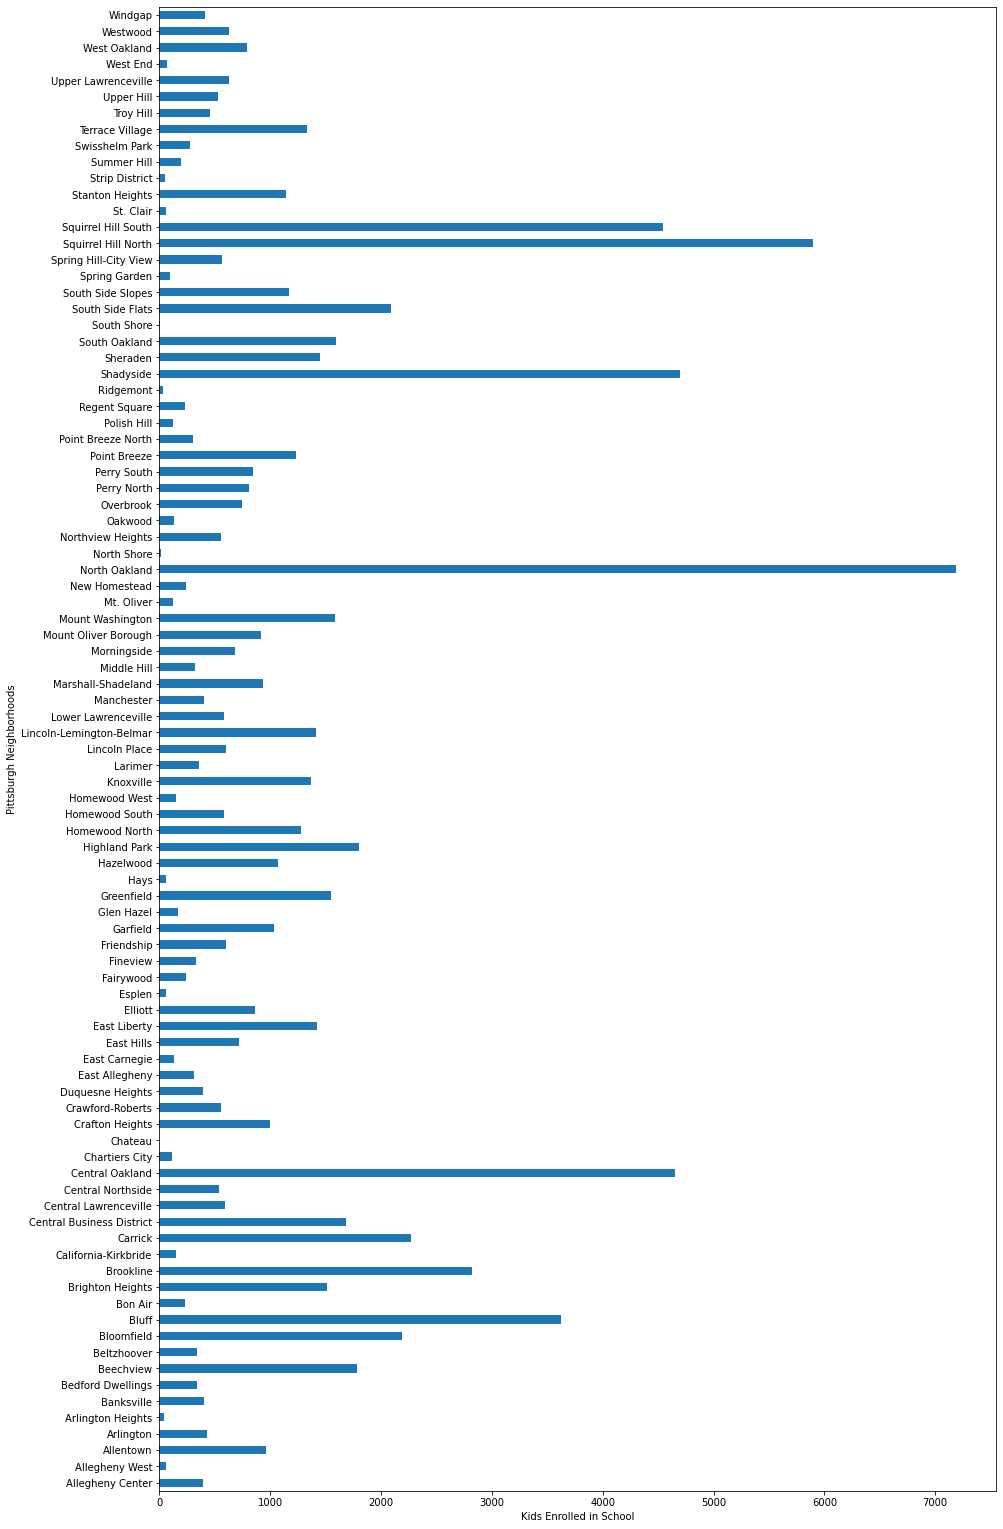

In [19]:
#create a bar graph showing a physical model to depict the enrollment differences between the neighborhoods
graph = schools.plot.barh(x="Neighborhood",y="Estimate; Enrolled in school:",figsize=(15,schools.shape[0] * 0.3), legend=None)
graph.set_xlabel("Kids Enrolled in School")
graph.set_ylabel("Pittsburgh Neighborhoods")
graph.get_figure().savefig('figure.pdf')


Text(0, 0.5, 'Pittsburgh Neighborhoods')

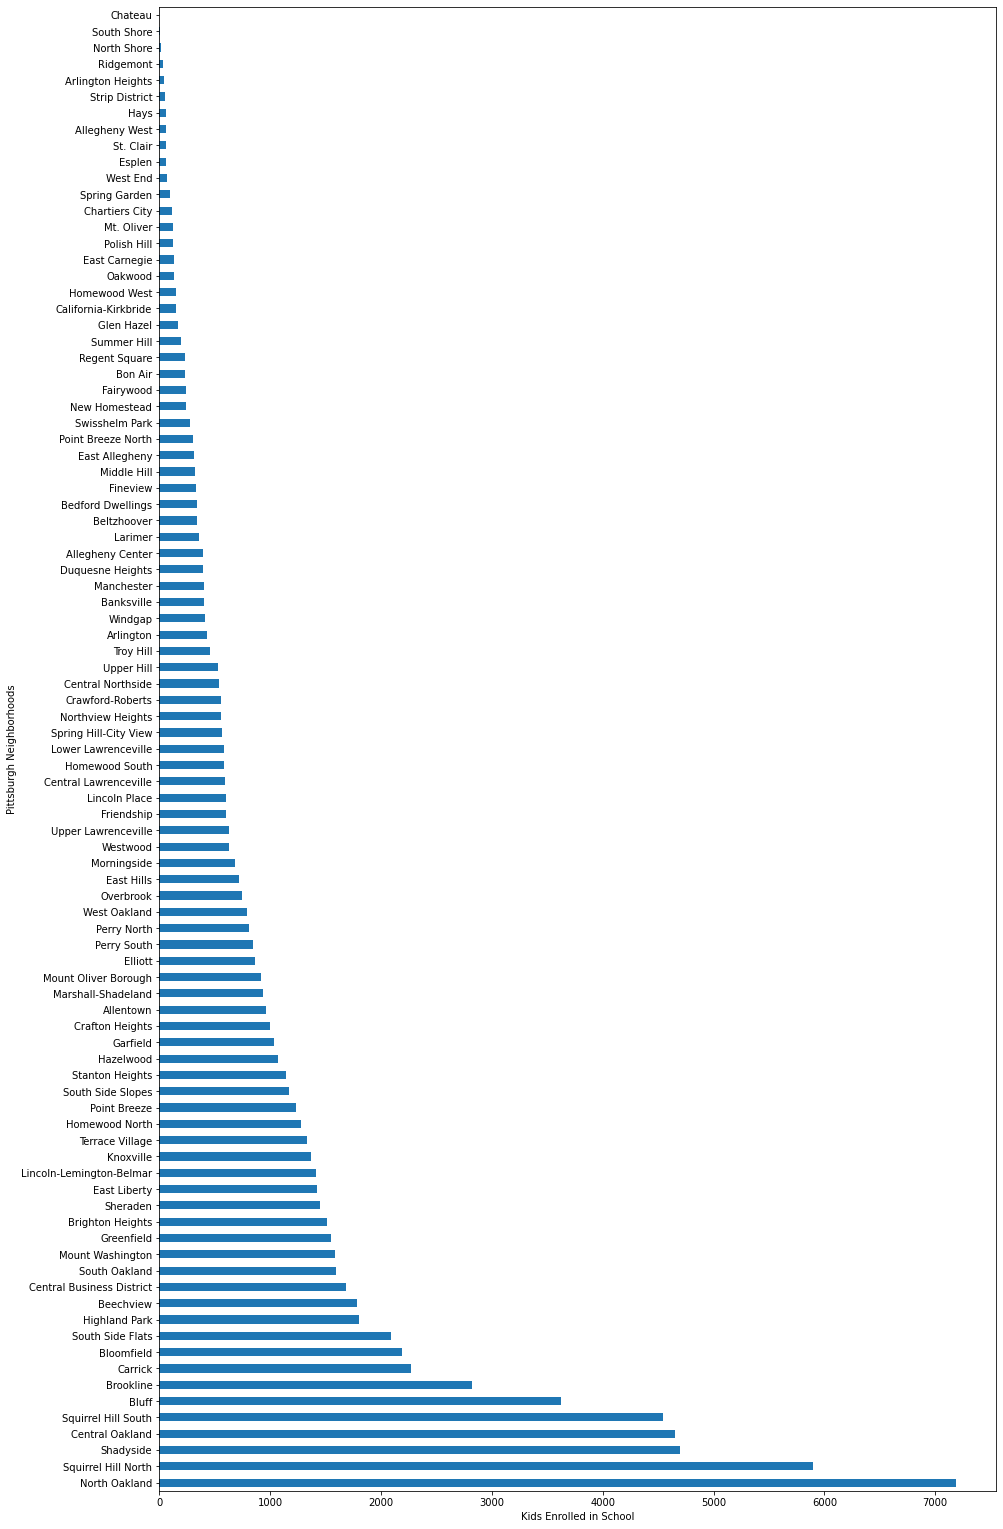

In [25]:
#Sorts the bar graph into descending order
schoolssort = schools.sort_values(by=["Estimate; Enrolled in school:"], ascending=False)

graph = schoolssort.plot.barh(x="Neighborhood",y="Estimate; Enrolled in school:",figsize=(15,schools.shape[0] * 0.3), legend=None)
graph.set_xlabel("Kids Enrolled in School")
graph.set_ylabel("Pittsburgh Neighborhoods")



In [6]:
#get an idea of the average number of those enrolled and not enrolled in pittsburgh. This will be used as a comparison
schools[['Neighborhood', 'Estimate; Enrolled in school:', 'Estimate; Not enrolled in school']].describe()

,Estimate; Enrolled in school:,Estimate; Not enrolled in school
count,91.000000,91.000000
mean,988.241758,2308.670330
std,1285.630855,2186.231151
min,0.000000,3.000000
25%,236.000000,884.500000
50%,587.000000,1601.000000
75%,1254.000000,2843.500000
max,7192.000000,10969.000000


In [32]:
# display neighborhoods with above average enrollment 
enrolled = schools[schools['Estimate; Enrolled in school:'] > 988]
enrolled[['Neighborhood', 'Estimate; Enrolled in school:', 'Estimate; Not enrolled in school', 'Estimate; Total:']]

,Neighborhood,Estimate; Enrolled in school:,Estimate; Not enrolled in school,Estimate; Total:
7,Beechview,1783.0,5987.0,7770.0
9,Bloomfield,2185.0,6313.0,8498.0
10,Bluff,3625.0,2664.0,6289.0
12,Brighton Heights,1511.0,5607.0,7118.0
13,Brookline,2824.0,9953.0,12777.0
15,Carrick,2274.0,7551.0,9825.0
16,Central Business District,1685.0,2352.0,4037.0
19,Central Oakland,4656.0,1166.0,5822.0
22,Crafton Heights,996.0,2795.0,3791.0
28,East Liberty,1420.0,3862.0,5282.0


In [33]:
enrolled = schools[schools['Estimate; Enrolled in school:'] > 988]
#filter to get rid of neighborhoods that have more than average not enrolled
not_enrolled = enrolled[enrolled['Estimate; Not enrolled in school'] < 2308]
#display results 
not_enrolled[['Neighborhood', 'Estimate; Enrolled in school:', 'Estimate; Not enrolled in school', 'Estimate; Total:']]

,Neighborhood,Estimate; Enrolled in school:,Estimate; Not enrolled in school,Estimate; Total:
19,Central Oakland,4656.0,1166.0,5822.0
40,Homewood North,1276.0,1779.0,3055.0
70,South Oakland,1598.0,1312.0,2910.0
83,Terrace Village,1328.0,949.0,2277.0


Jessica's reflection:
According to the data above the "best neighborhood" soley based on enrollment numbers would have to be Central Oakland which in hindsight makes the most sense as it a neighborhood heavily populated by college students. 